<a href="https://colab.research.google.com/github/Mushfiq-Azam/Learn-ML-with-Mushfiq/blob/main/Next_Gen_update1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder



import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("2.csv")

In [2]:
# Step 1: Data Insight
info = df.info()
desc = df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                18915 non-null  float64
 1   A2                 18915 non-null  object 
 2   C1                 18915 non-null  object 
 3   D2                 18915 non-null  object 
 4   D4                 18915 non-null  object 
 5   D8                 18915 non-null  object 
 6   D10                18915 non-null  object 
 7   D15                18915 non-null  object 
 8   job                18405 non-null  object 
 9   F15                18915 non-null  object 
 10  M8                 18915 non-null  object 
 11  E17                18915 non-null  object 
 12  G1                 18915 non-null  object 
 13  J2                 18915 non-null  object 
 14  J4                 18915 non-null  object 
 15  J9                 18915 non-null  object 
 16  E1                 189

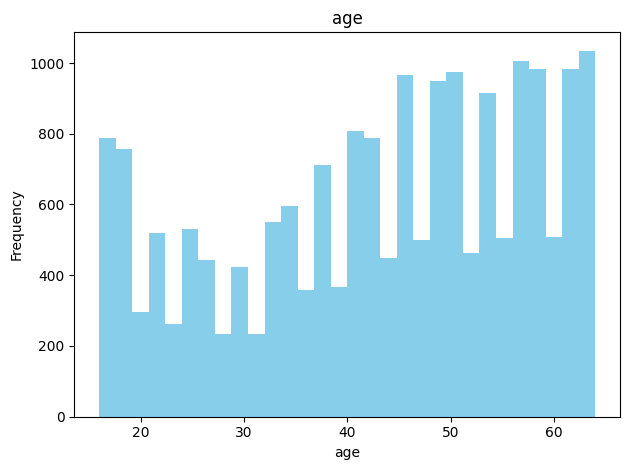

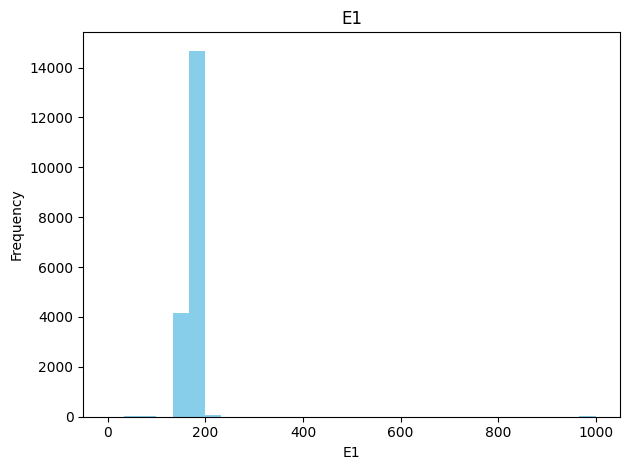

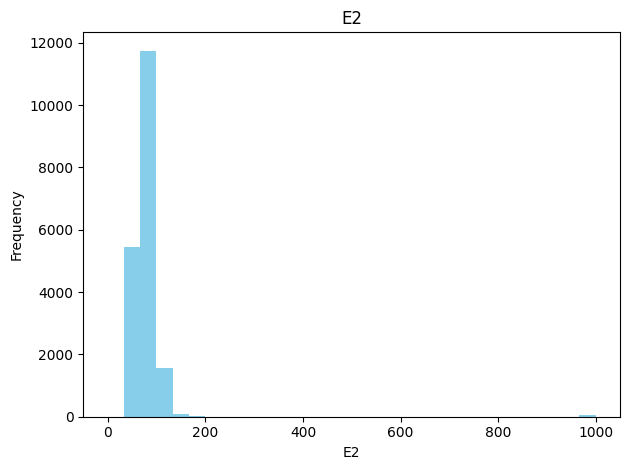

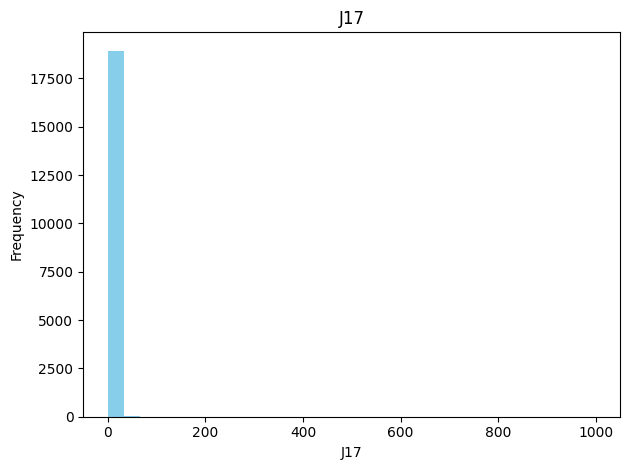

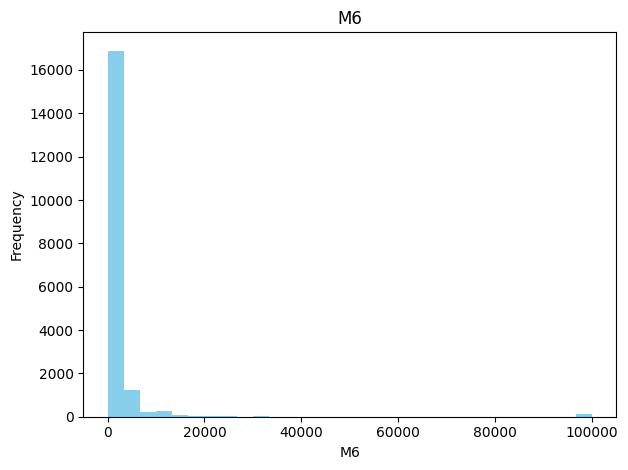

In [3]:
# Step 2: Numerical Histograms
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_features[:5]:  # You can change or remove the slice if you want all
    df[col].plot(kind='hist', bins=30, color='skyblue', title=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

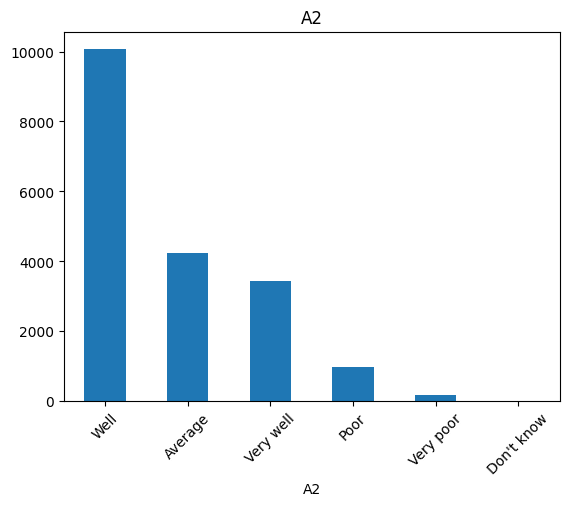

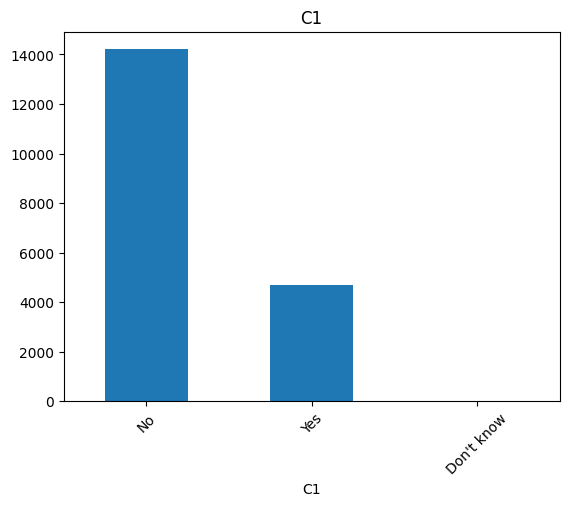

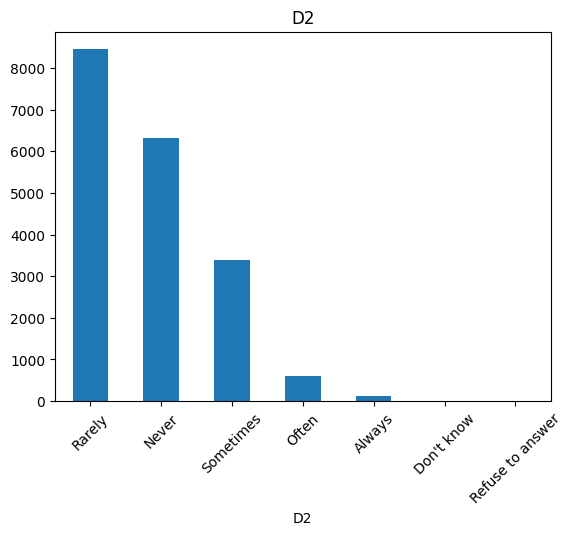

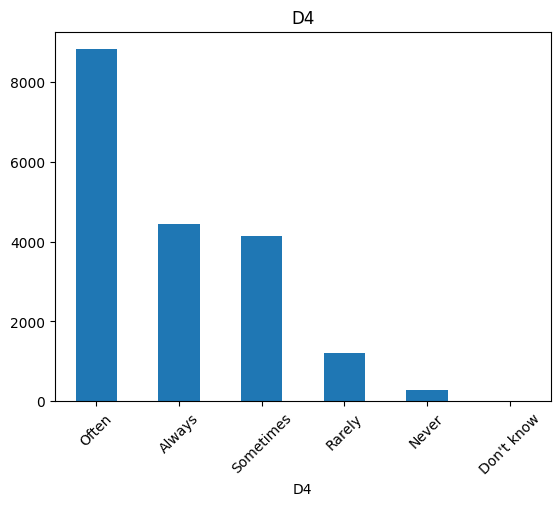

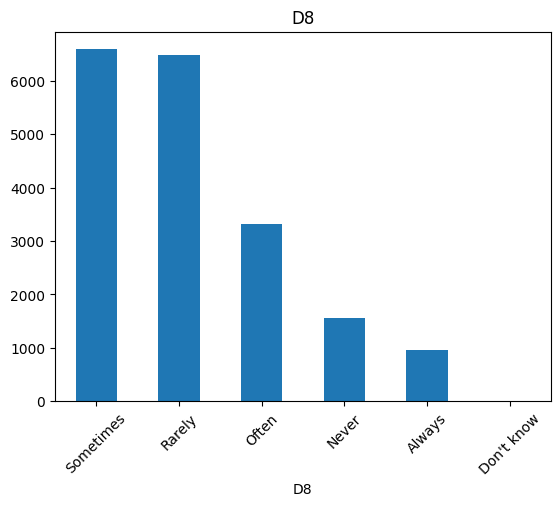

In [4]:
# Step 3: Categorical Bar Charts
categorical_features = df.select_dtypes(include='object').columns.tolist()
for col in categorical_features[:5]:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.xticks(rotation=45)
    plt.show()

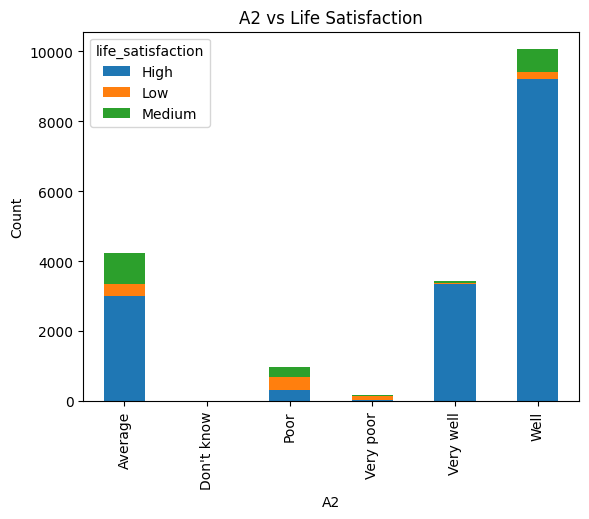

In [5]:
# Step 4: Bar Plot Categorical vs Categorical
pd.crosstab(df['A2'], df['life_satisfaction']).plot(kind='bar', stacked=True)
plt.title("A2 vs Life Satisfaction")
plt.ylabel("Count")
plt.show()

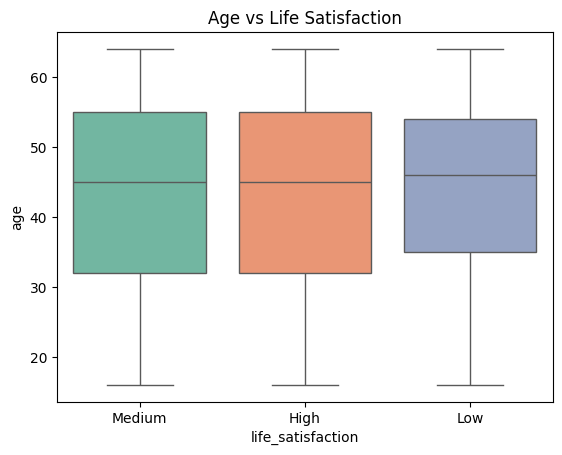

In [6]:
# Step 5: Categorical vs Numerical
sns.boxplot(data=df, x='life_satisfaction', y='age', palette='Set2')
plt.title("Age vs Life Satisfaction")
plt.show()

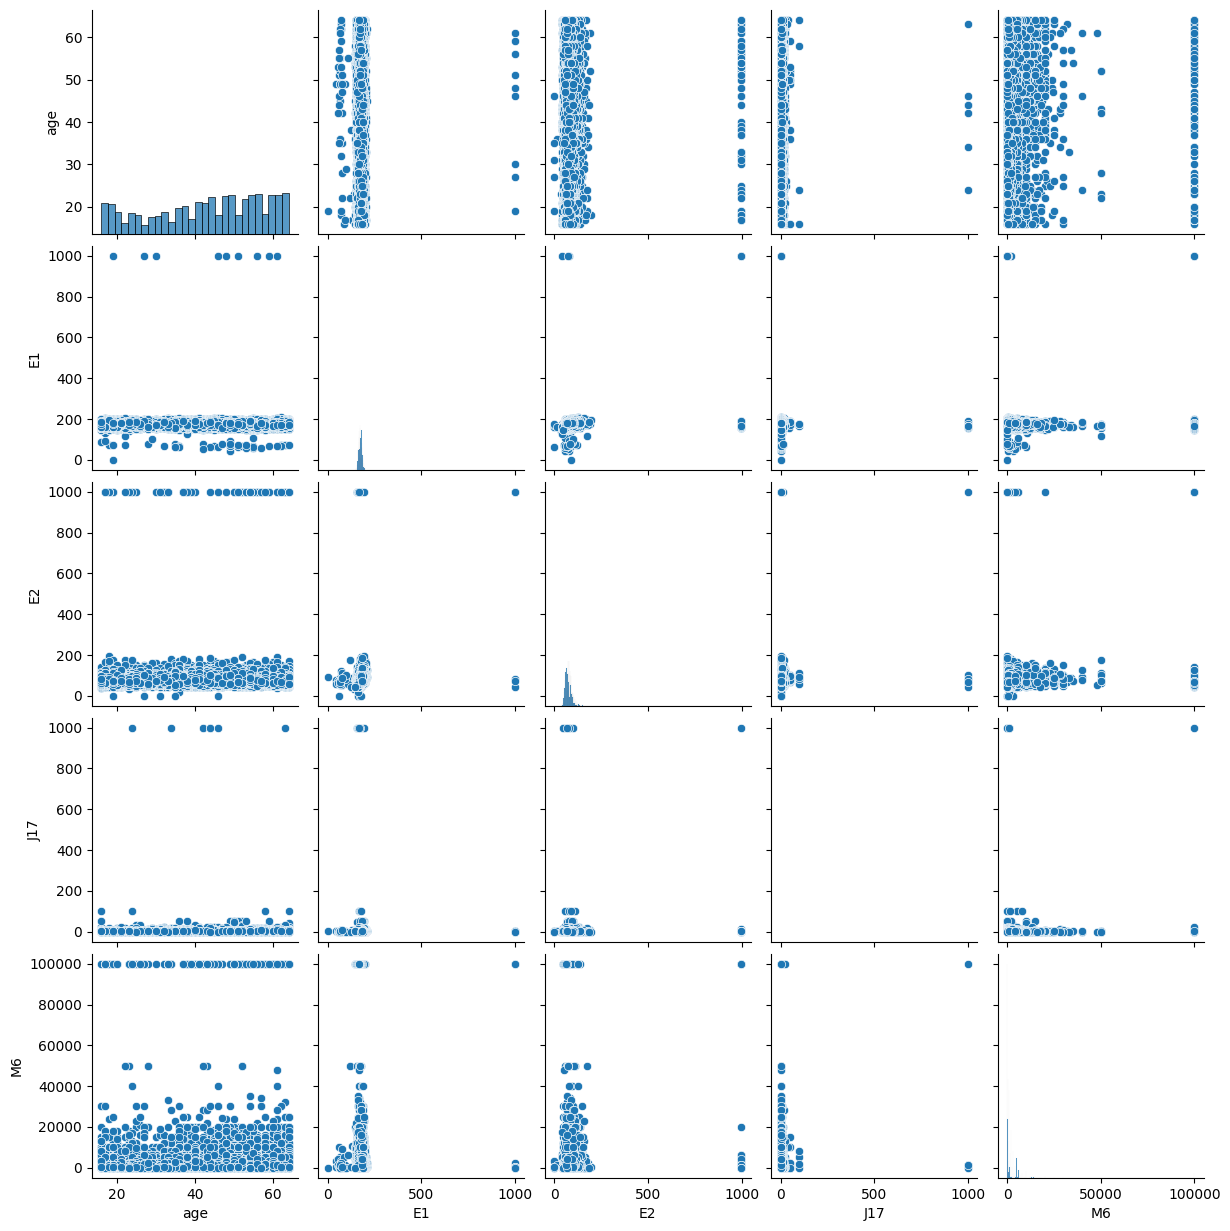

In [7]:
# Step 6: Pair Plot
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numeric_df)
plt.show()

In [8]:
# Step 7: Missing Data Handling
# Separate column types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

In [9]:
# Fill numeric columns with mean
df[num_cols] = SimpleImputer(strategy='mean').fit_transform(df[num_cols])

In [10]:
# Fill categorical columns with 'Unknown'
df[cat_cols] = SimpleImputer(strategy='constant', fill_value='Unknown').fit_transform(df[cat_cols])


In [11]:
# Step 8: Stratified Sampling (line 139)
X = df.drop('life_satisfaction', axis=1)
y = df['life_satisfaction']

In [12]:
# Step 9: One Hot Encoding
categorical_features.remove('life_satisfaction')
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

In [13]:
# Step 10: Standardization
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_encoded)

In [14]:
# Step 11: SMOTE + Tomek Links
sm = SMOTE(random_state=42)
tl = TomekLinks()
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)
X_cleaned, y_cleaned = tl.fit_resample(X_resampled, y_resampled)

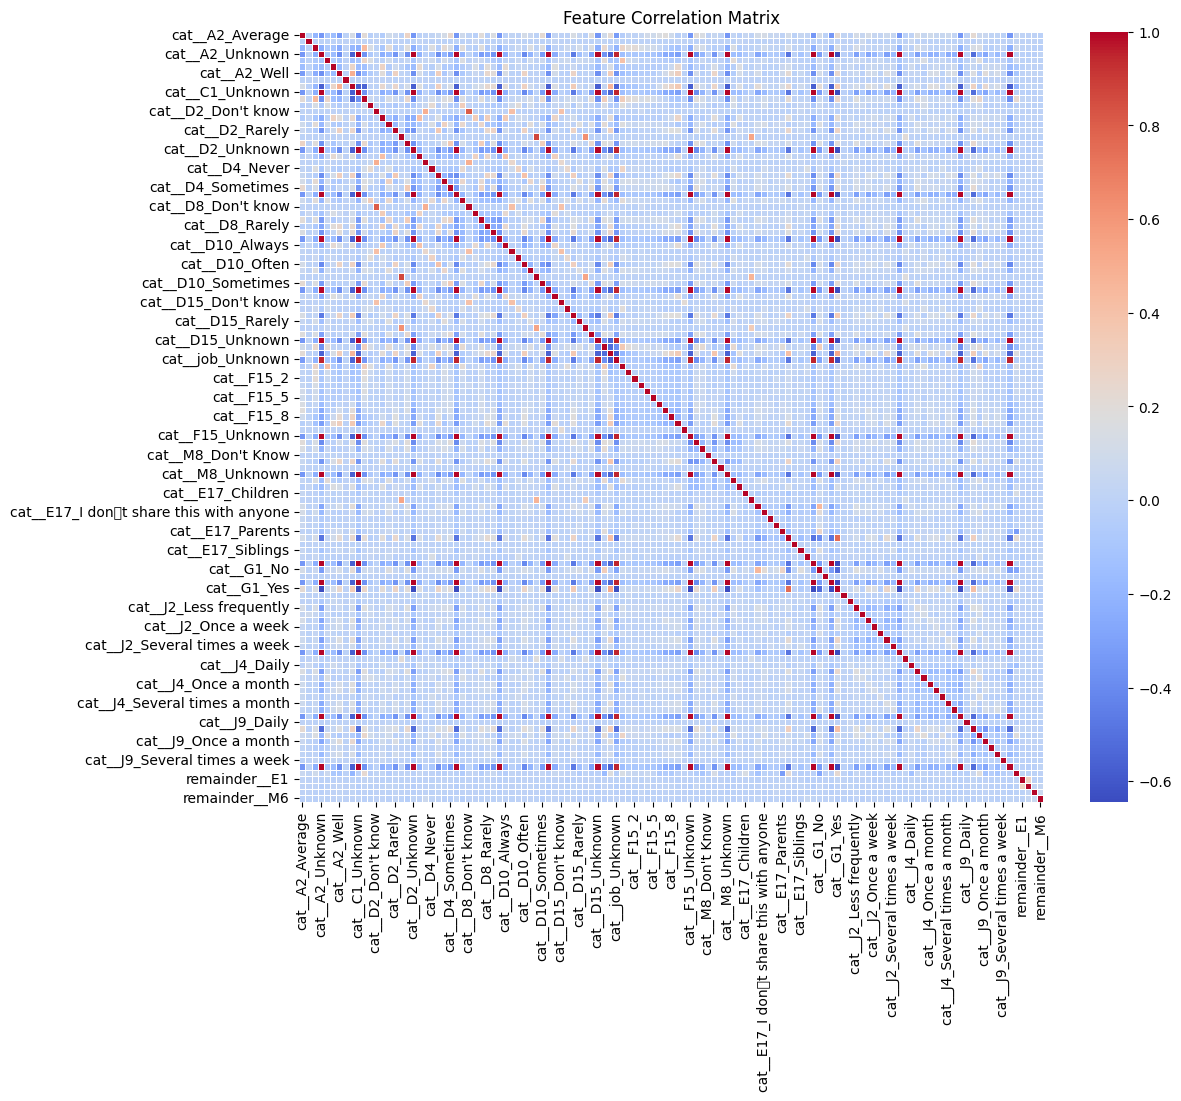

In [15]:
# Step 12:correlation matrix
feature_names = preprocessor.get_feature_names_out()

# Convert to dense if sparse
X_cleaned_dense = X_cleaned.toarray() if hasattr(X_cleaned, "toarray") else X_cleaned
X_cleaned_df = pd.DataFrame(X_cleaned_dense, columns=feature_names)
corr_matrix = X_cleaned_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [16]:
# Step 13: Outlier Removal
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(X_cleaned)
mask = outliers != -1
X_clean, y_clean = X_cleaned[mask], y_cleaned[mask]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_clean)

# 🔹 Train-test split (70% train, 30% test)
# X_train, X_test, y_train, y_test = train_test_split(X_clean, y_encoded, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42 #Stratified Sampling
)

In [17]:
# Step 14: ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


results = {
    "Accuracy": {},
    "MAE": {},
    "MSE": {},
    "RMSE": {},
    "R2": {},
}

n = X_test.shape[0]  # test sample size
k = X_test.shape[1]  # number of features

# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)

    # Special handling for Linear Regression
    if name == "Linear Regression":
        y_pred_cont = model.predict(X_test)  # continuous predictions
        y_pred_class = np.clip(np.round(y_pred_cont), 0, 2).astype(int)  # for accuracy
    else:
        y_pred_class = model.predict(X_test)
        y_pred_cont = y_pred_class  # classification models already predict discrete

    # Classification metric
    acc = accuracy_score(y_test, y_pred_class)

    # Regression metrics using continuous values
    mse = mean_squared_error(y_test, y_pred_cont)
    mae = mean_absolute_error(y_test, y_pred_cont)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_cont)

    # Store metrics
    results["Accuracy"][name] = acc
    results["MAE"][name] = mae
    results["MSE"][name] = mse
    results["RMSE"][name] = rmse
    results["R2"][name] = r2

                     Accuracy     MAE     MSE    RMSE      R2
Random Forest          0.9610  0.0634  0.1120  0.3347  0.9106
XGBoost                0.9346  0.0921  0.1454  0.3813  0.8840
Decision Tree          0.8985  0.1454  0.2331  0.4828  0.8141
SVM                    0.7667  0.3275  0.5159  0.7182  0.5884
Logistic Regression    0.7568  0.3401  0.5340  0.7308  0.5740
Linear Regression      0.3411  0.4444  0.3703  0.6085  0.7046


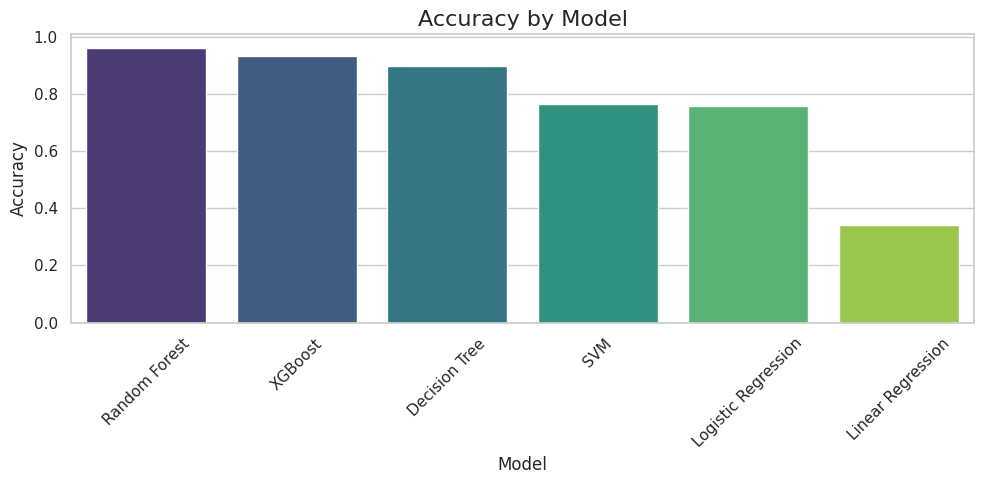

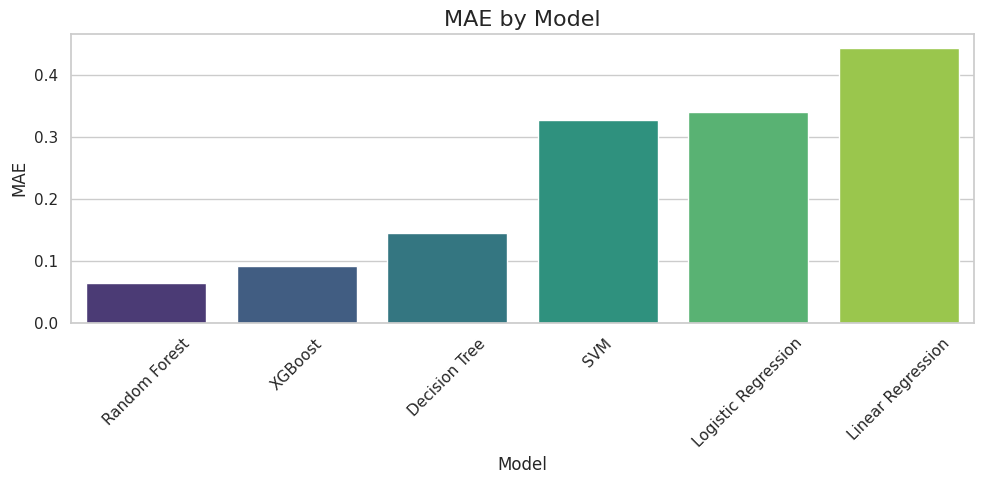

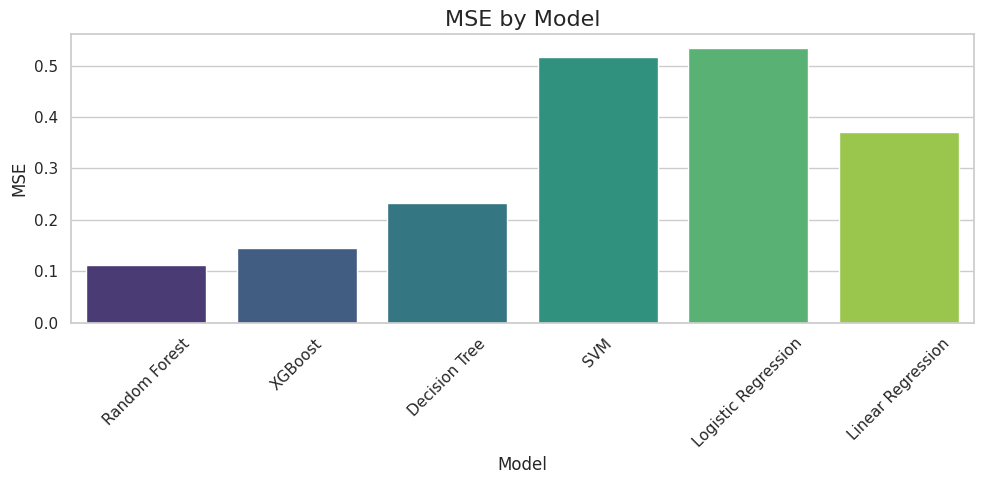

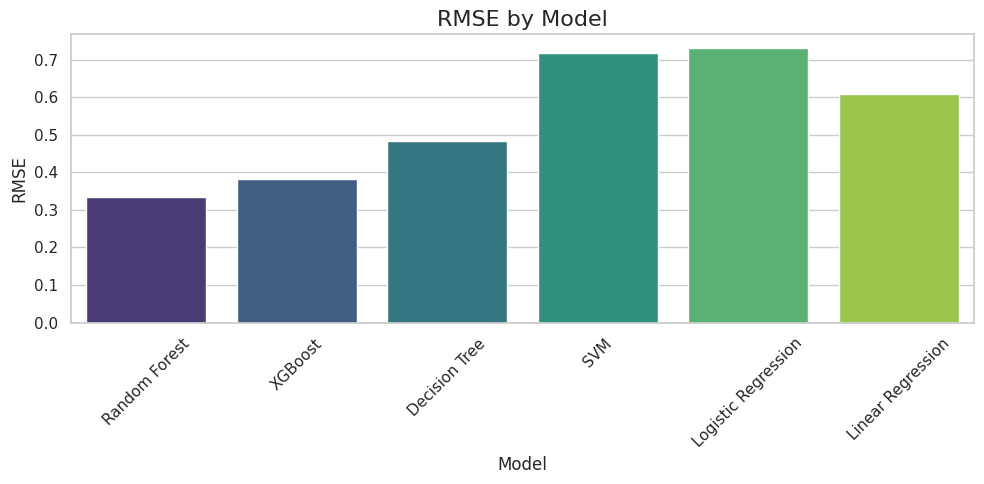

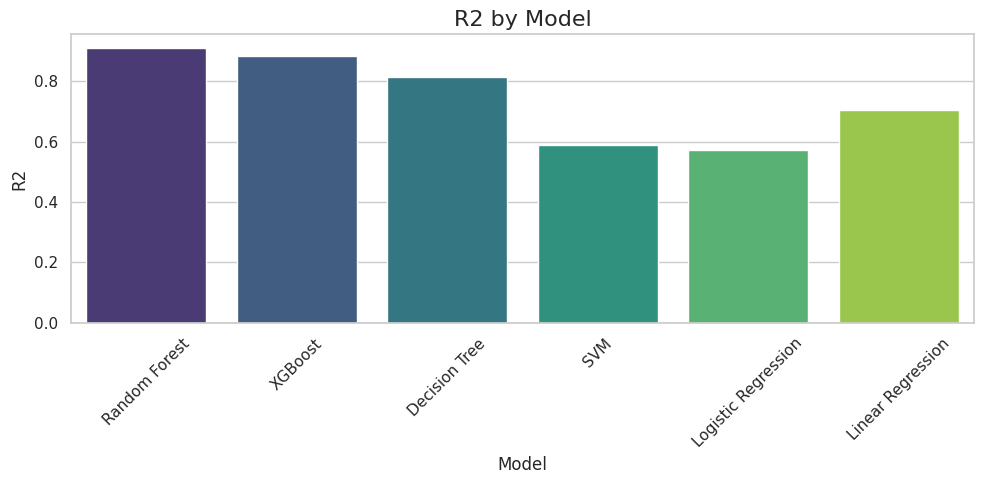

In [18]:
# Step 15: Show comparison table
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values("Accuracy", ascending=False)
print(comparison_df.round(4))

#plot evaluation
# set plot
sns.set(style="whitegrid")
metrics = ["Accuracy", "MAE", "MSE", "RMSE", "R2"]

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=comparison_df.index,
        y=metric,
        data=comparison_df,
        palette="viridis"
    )
    plt.title(f"{metric} by Model", fontsize=16)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()